In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/content/Housing.csv')
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
115,6020000,8000,3,1,1,yes,yes,yes,no,yes,2,yes,semi-furnished
67,6895000,7700,3,2,1,yes,no,no,no,no,2,no,unfurnished
96,6300000,9000,3,1,1,yes,no,yes,no,no,1,yes,furnished
395,3500000,3600,6,1,2,yes,no,no,no,no,1,no,unfurnished
383,3570000,4500,4,2,2,yes,no,yes,no,no,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
458,3115000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished
226,4690000,5170,3,1,4,yes,no,no,no,yes,0,no,semi-furnished
256,4480000,4000,3,1,2,yes,no,no,no,no,2,no,furnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished


In [4]:
df.columns.to_list()

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [5]:
df = df[[
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus','price',]]

df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


In [6]:
df.isna().sum()

,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0
parking,0


In [7]:
bedrooms_count = df['bedrooms'].value_counts()
bedrooms_count

,count
bedrooms,
3,300
2,136
4,95
5,10
6,2
1,2


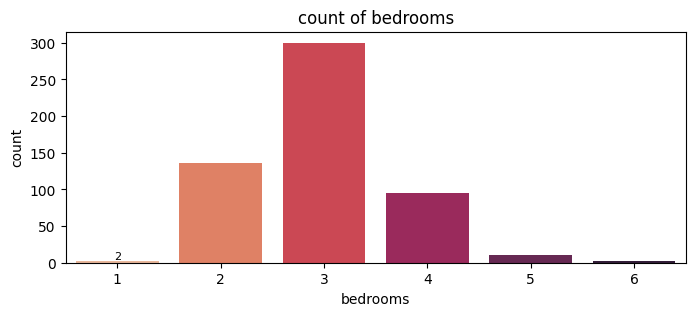

In [8]:
plt.figure(figsize=(8,3))
ax=sns.barplot(x=bedrooms_count.index, y=bedrooms_count.values,palette="rocket_r")
ax.bar_label(ax.containers[0], fontsize=8);
plt.title('count of bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('count')
plt.show()

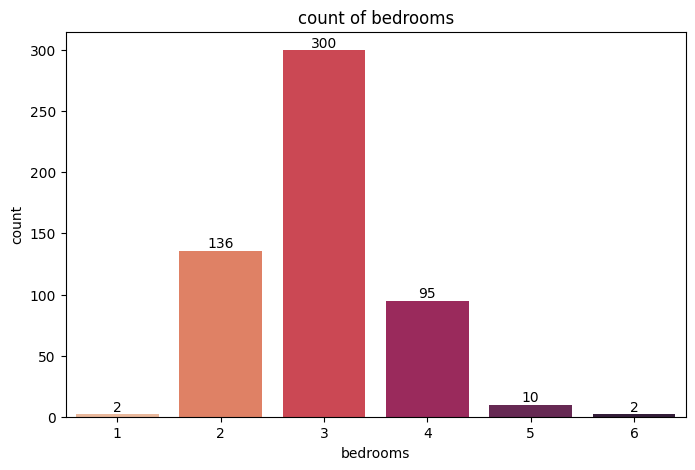

In [10]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x=bedrooms_count.index, y=bedrooms_count.values,palette="rocket_r")

for bars in ax.containers:
  ax.bar_label(bars)

plt.title('count of bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('count')
plt.show()

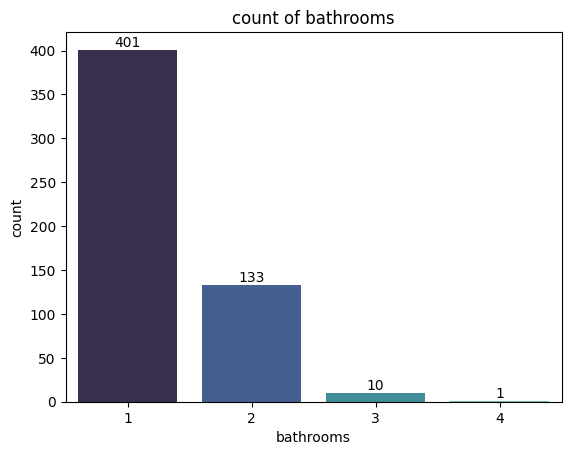

In [11]:
count_bathrooms = df['bathrooms'].value_counts()

ax = sns.barplot(x=count_bathrooms.index,y=count_bathrooms.values,palette="mako")

for bars in ax.containers:
  ax.bar_label(bars)

plt.title('count of bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('count')
plt.show()

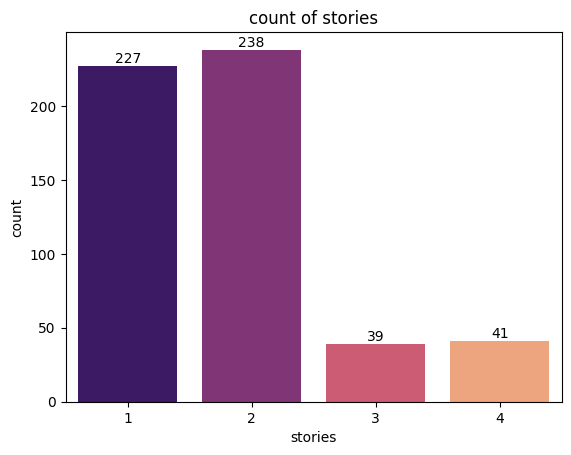

In [12]:
stories_count = df['stories'].value_counts()

ax = sns.barplot(x=stories_count.index,y=stories_count.values,palette="magma")

for bars in ax.containers:
  ax.bar_label(bars)

plt.title('count of stories')
plt.xlabel('stories')
plt.ylabel('count')
plt.show()

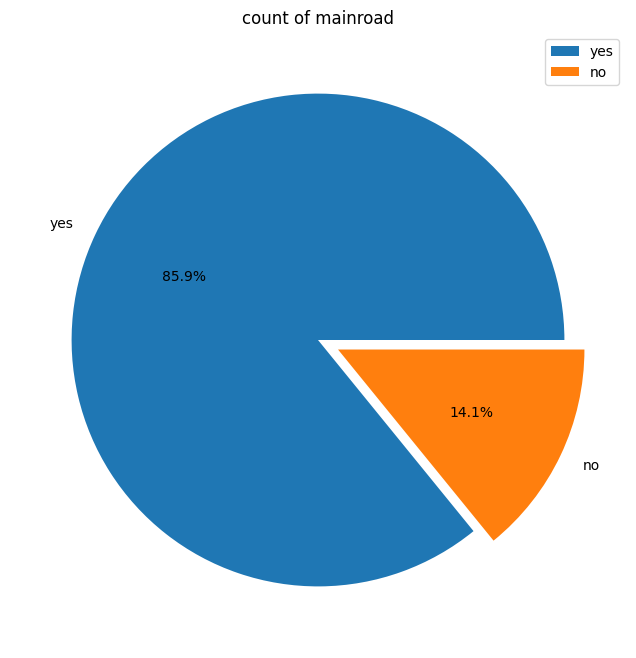

In [13]:
count_mainroad=df['mainroad'].value_counts()

explode = [0, 0.09]

colors = sns.color_palette("tab10")

plt.figure(figsize=(8,8))

plt.pie(count_mainroad.values,
        labels=count_mainroad.index,
        autopct='%.1f%%',explode=explode,
        colors = colors)

plt.title("count of mainroad")
plt.legend(loc = "best")

plt.show()

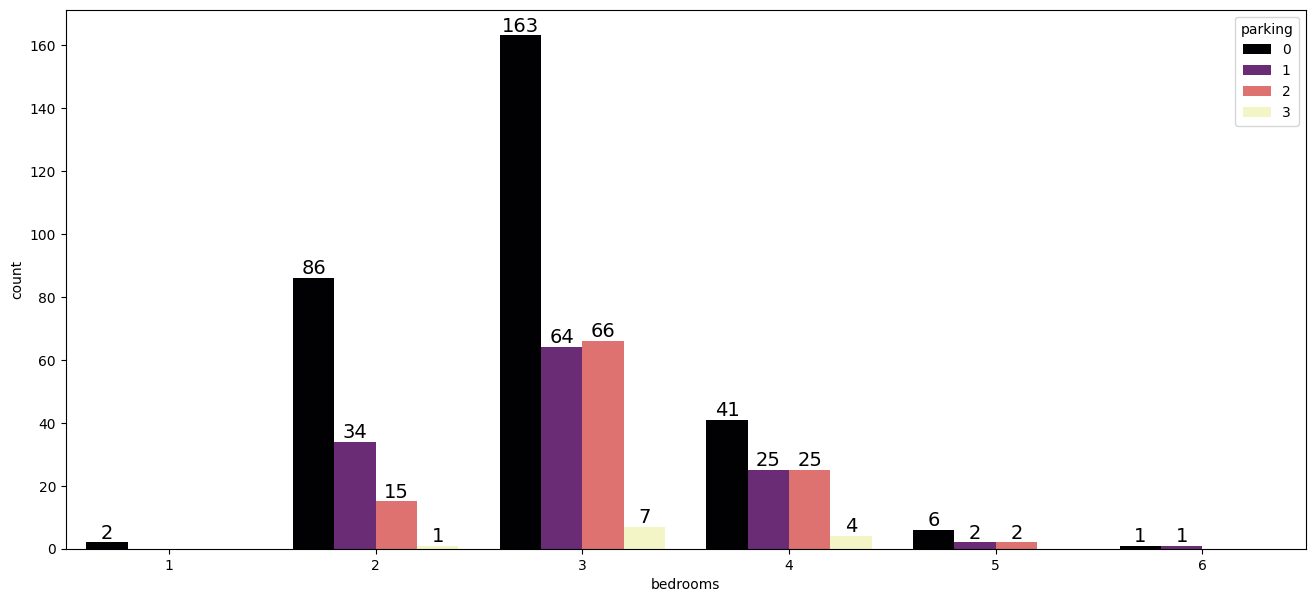

In [14]:
plt.figure(figsize=(16,7))

ax = sns.countplot(df, x="bedrooms", hue="parking",palette="magma")

for i in range(len(df['parking'].unique())):
    ax.bar_label(ax.containers[i], fontsize=14)


plt.show()

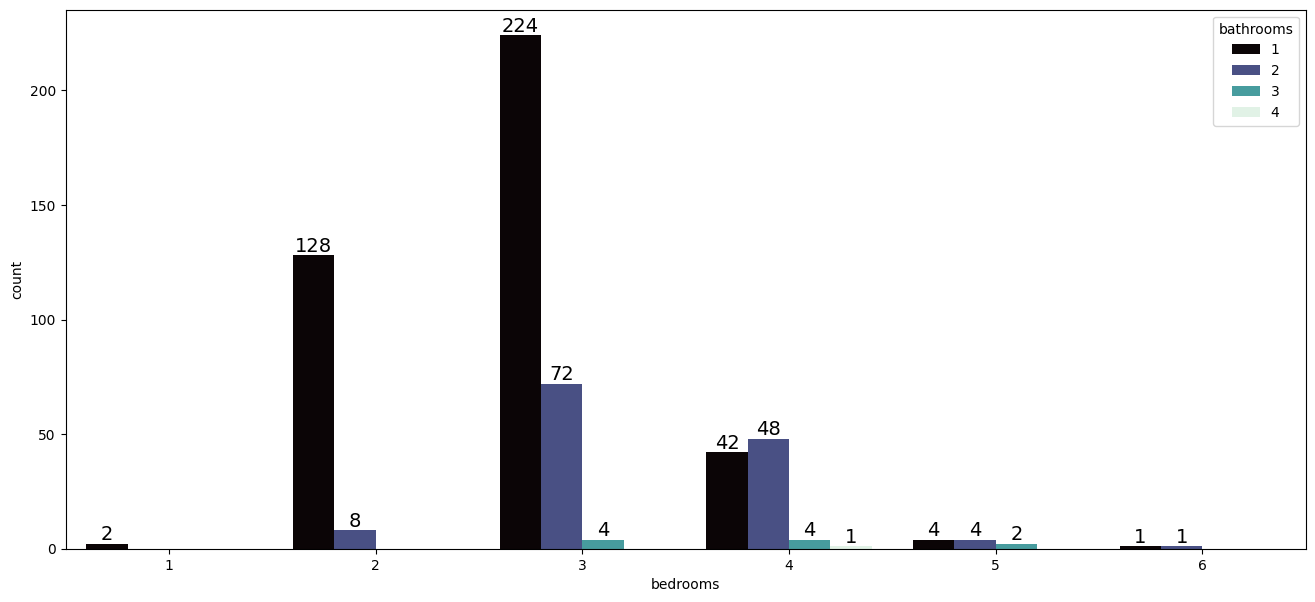

In [15]:
plt.figure(figsize=(16,7))

ax = sns.countplot(df, x="bedrooms", hue="bathrooms",palette="mako")
for i in range(len(df['bathrooms'].unique())):
    ax.bar_label(ax.containers[i], fontsize=14)

plt.show()

In [16]:
df = df.drop('hotwaterheating',axis=1)

In [17]:
encoder = LabelEncoder()

encoding_col = ['furnishingstatus','prefarea','airconditioning','basement','guestroom','mainroad']
for col in encoding_col:
    df[col]=encoder.fit_transform(df[col])

df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,1,0,0,1,2,1,0,13300000
1,8960,4,4,4,1,0,0,1,3,0,0,12250000
2,9960,3,2,2,1,0,1,0,2,1,1,12250000
3,7500,4,2,2,1,0,1,1,3,1,0,12215000
4,7420,4,1,2,1,1,1,1,2,0,0,11410000


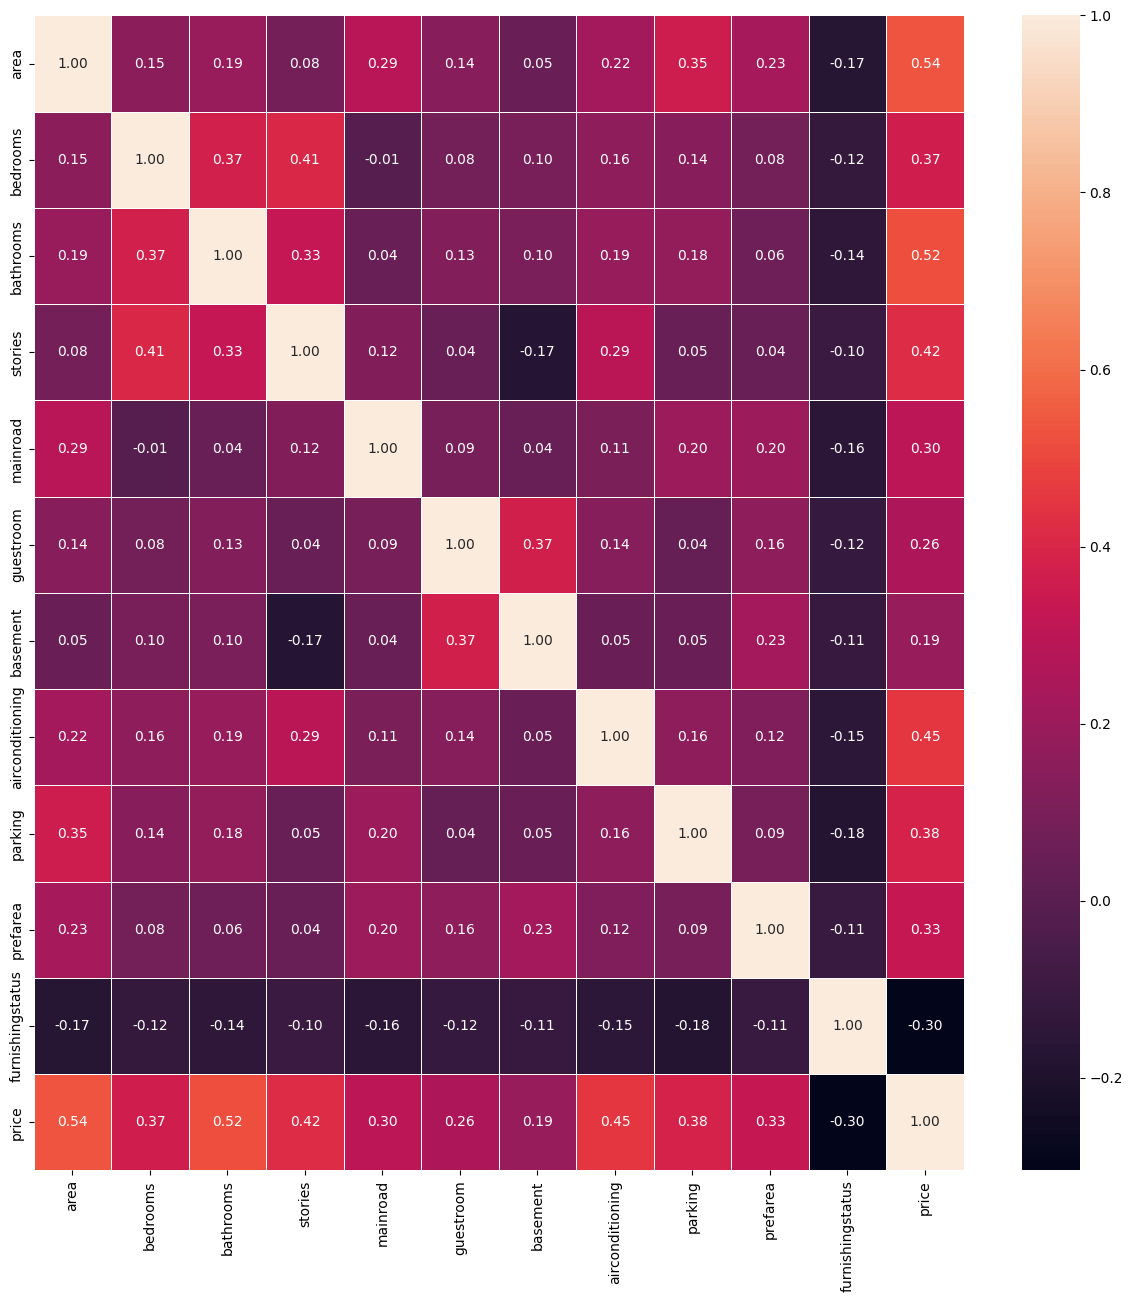

In [18]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5, cbar=True)
plt.show()

In [19]:
x=df.drop(columns=['price'],axis = 1)
y=df['price']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [21]:
ln_model = LinearRegression()
ln_model.fit(x_train, y_train)

LinearRegression()

In [22]:
y_pred = ln_model.predict(x_test)

In [23]:
ln_acc = r2_score(y_test, y_pred)
ln_acc

0.760395407347663

In [24]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

Mean Absolute Error (MAE): 730364.5450
Mean Squared Error (MSE): 814863259975.9052
R-squared (R2) Score: 0.7604


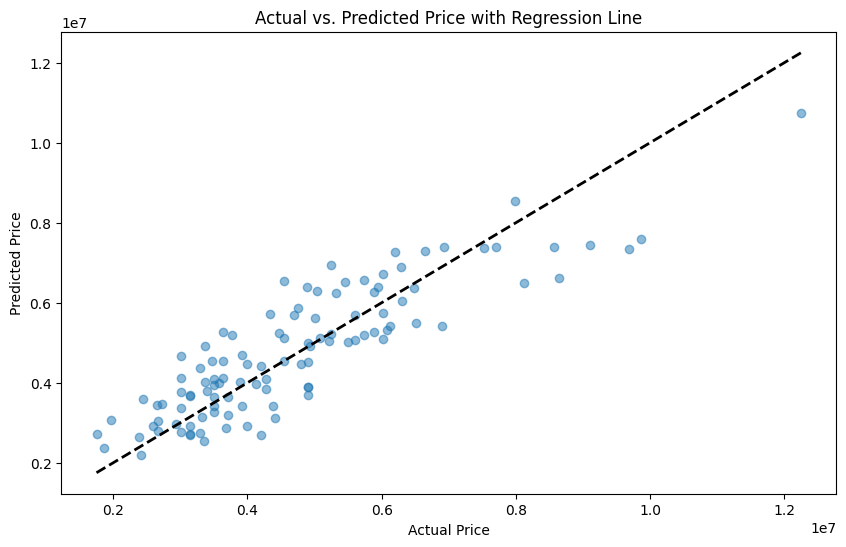

Model Coefficients:
area: 232.1630
bedrooms: 142975.2255
bathrooms: 942811.2639
stories: 480787.6433
mainroad: 531231.5658
guestroom: 224627.9273
basement: 324868.6188
airconditioning: 816201.0029
parking: 322459.2740
prefarea: 617706.6612
furnishingstatus: -212354.6425

Intercept: 71403.1306


In [25]:
# Plotting the regression line (actual vs. predicted prices)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Price with Regression Line")
plt.show()

# Interpreting the coefficients
print("Model Coefficients:")
for col, coef in zip(x.columns, ln_model.coef_):
    print(f"{col}: {coef:.4f}")

print(f"\nIntercept: {ln_model.intercept_:.4f}")

In [26]:
# Note: For categorical features, use the encoded values (0 or 1 for binary, 0, 1, 2 for furnishingstatus)
user_input = [[6000, 3, 2, 2, 1, 0, 0, 1, 1, 1, 1]] # Example: area=6000, bedrooms=3, bathrooms=2, stories=2, mainroad=yes, guestroom=no, basement=no, airconditioning=yes, parking=1, prefarea=yes, furnishingstatus=semi-furnished

# Convert to pandas DataFrame for consistent processing
user_df = pd.DataFrame(user_input, columns=['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus'])

# Make the prediction
predicted_price = ln_model.predict(user_df)

print(f"The predicted price for the given input is: ${predicted_price[0]:,.2f}")

The predicted price for the given input is: $6,815,748.22
